In [ ]:
!pip install openai
!pip install dashscope
!pip install zhipuai
!pip install chromadb
!pip install langchain_openai
!pip install langchain
!pip install -U langchain-community
!pip install pymupdf
!pip install unstructured
!pip install python-dotenv

In [2]:
%%writefile .env
##qwen base_url 'https://dashscope.aliyuncs.com/compatible-mode/v1'
#Zhipu base_url 'https://open.bigmodel.cn/api/paas/v4/'
OPENAI_BASE_URL='https://dashscope.aliyuncs.com/compatible-mode/v1'
ZHIPUAI_API_KEY='68604cc3e382eba3aba03daca6f4f717.fteCwuYKtXWpexN6'
DASHSCOPE_API_KEY='sk-d4c3f773af5d442c97eb7d9e40479c55'
OPENAI_API_KEY=${DASHSCOPE_API_KEY}

Writing .env


In [1]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv(),override=True)

In [2]:
from RAG import add_to_chormadb,retrieval
from embeddings import DashScopeEmbeddings,ZhipuAIEmbeddings
embedding = DashScopeEmbeddings(
        model="text-embedding-v2",
)
mode='load'
if mode=='build':
    folder_path = 'notebook/test_input'
    vectordb=add_to_chormadb(folder_path,embedding,'MyChroma')
else:
    from langchain.vectorstores.chroma import Chroma
    vectordb=Chroma(persist_directory='MyChroma',embedding_function=embedding)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 0.4. An updated version of the class exists in the langchain-chroma package and should be used instead. To use it run `pip install -U langchain-chroma` and import as `from langchain_chroma import Chroma`.
  warn_deprecated(


In [8]:
from langchain.chat_models import ChatOpenAI
model_name='qwen2-7b-instruct'
llm = ChatOpenAI(model=model_name,temperature=0)

In [20]:
instruct="对比真核生物和原核生物"
from ReWriter import instruct_rewriter,contents_rewriter
rewrited_instruct=instruct_rewriter(llm,instruct)
retrieval_input=retrieval(instruct=rewrited_instruct,vectordb=vectordb,k=2)
rewrited_contents=contents_rewriter(llm=llm,instruct=rewrited_instruct,input=retrieval_input)
print(rewrited_instruct)
print(rewrited_contents)

我需要对真核生物和原核生物进行详细的对比分析，包括它们的细胞结构、遗传物质的组织方式、繁殖方式以及在生态系统中的角色等方面。请确保重写后的指令能够全面覆盖这些内容，以便于我对这两种生物类型有更深入的理解。
重写结果：

为了深入理解生命的基本单位，我们将探讨真核生物和原核生物之间的显著区别，涵盖它们的细胞结构、遗传物质的组织、繁殖机制，以及在生态系统中的角色。这将帮助我们更好地认识生命的多样性和复杂性。

**细胞结构：**

- **原核生物**的细胞结构相对简单，没有真正的细胞核或膜包裹的细胞器。它们的DNA以一个或多个环状分子的形式存在，通常位于细胞质中的一个特定区域，称为核区。原核生物的细胞壁主要由肽聚糖构成，提供结构支持和保护。一些原核生物如细菌还拥有鞭毛和纤毛，用于运动；而古细菌则能适应极端环境，如高温或盐度极高的环境。
  
- **真核生物**的细胞则更为复杂，拥有膜包围的细胞核，其中包含线性DNA分子形成的染色体。此外，真核细胞含有多种膜包被的细胞器，如线粒体、高尔基体、内质网和溶酶体，各自执行不同的功能。真核生物的细胞壁成分多样，如植物细胞壁主要由纤维素构成，而真菌的细胞壁则主要由几丁质组成。

**遗传物质的组织：**

- **原核生物**的遗传物质以单一环状DNA分子为主，有时会存在额外的质粒DNA，可以独立复制并传递给后代，赋予生物特定的遗传特性，如抗生素抗性。

- **真核生物**的遗传物质则以线性DNA分子的形式存在，组织成染色体。每个染色体包含大量的基因，负责编码蛋白质和调控细胞功能。真核生物的遗传信息更为复杂，包括基因表达调控、染色体重组等过程。

**繁殖方式：**

- **原核生物**主要通过无性繁殖，如二分裂的方式迅速增殖。虽然它们也可以通过接合、转化和转导等方式交换遗传物质，实现一定程度的遗传多样性。

- **真核生物**的繁殖方式更为多样化，包括无性繁殖（如出芽生殖、分裂生殖）和有性繁殖。有性繁殖过程中，两个个体的配子融合，形成合子，随后发育成新个体，增加了遗传多样性。

**生态系统中的角色：**

- **原核生物**在地球上的分布极为广泛，它们在分解有机物、固氮、光合作用等方面发挥着关键作用，是许多生态系统的基础。例如，蓝藻是水体中重要的初级生产者，而根瘤菌则能与豆科植物共生，固定大气中的氮气。

- **真

In [9]:
from KnowledgeGenerator import KnowledgeGenerator
Generated_knowledge=KnowledgeGenerator(llm=llm,instruct=rewrited_instruct)
print(Generated_knowledge)

1. **热带气候类型及其特点**：

   - **热带雨林气候**：主要分布在赤道附近，如亚马逊、刚果盆地等。全年高温多雨，年平均气温在26-28℃之间，降水量丰富，年降水量可达2000毫米以上。

   - **热带草原气候**：位于热带雨林向沙漠过渡的地区，如非洲撒哈拉沙漠以南、南美洲的巴西高原等。特点是干湿季分明，湿季时降雨量大，可达1000-2000毫米；干季则几乎无雨，植物生长受限。

   - **热带沙漠气候**：主要分布在低纬度地区的大陆内部和回归线附近，如撒哈拉沙漠、阿拉伯沙漠等。全年炎热干燥，年降水量少于250毫米，白天日照强烈，夜晚温度下降明显。

2. **温带气候类型及其特点**：

   - **温带海洋性气候**：主要分布在中纬度地区的大陆西岸，如欧洲西部、北美太平洋沿岸等。冬季温和湿润，夏季凉爽多雨，年降水量均匀，约为500-1000毫米。

   - **温带大陆性气候**：主要分布在中高纬度的内陆地区，如俄罗斯、中国西北部等。冬季寒冷干燥，夏季温暖短暂，年降水量较少，集中在夏季。

   - **地中海气候**：主要分布在南北纬30-40度之间的大陆西岸，如地中海沿岸、美国加利福尼亚州南部等。特点是夏季炎热干燥，冬季温和多雨，年降水量一般为500-1000毫米。

3. **寒带气候类型及其特点**：

   - **极地气候**：主要分布在北极圈内，如格陵兰岛、北欧北部等。全年严寒，降水量很少，主要是雪，年降水量小于250毫米。

   - **苔原气候**：主要分布在北极圈附近的亚欧大陆和北美大陆，如西伯利亚、加拿大北部等。夏季短暂而温暖，冬季漫长而寒冷，降水量较少。

   - **冰原气候**：主要分布在南极洲，全年极端寒冷，降水量极低，主要为雪或冰雹，年降水量少于100毫米。

4. **特殊气候类型及其特点**：

   - **山地气候**：随着海拔升高，气温逐渐降低，降水模式与平原地区不同。例如喜马拉雅山脉、安第斯山脉等。

   - **沙漠气候**：除上述热带沙漠气候外，还包括其他地区由于特定地理条件形成的沙漠气候，如澳大利亚的中央大沙漠。

   - **城市热岛效应**：城市中的建筑物、道路等吸收并储存大量热量，导致城市中心比周围郊区更热，形成热岛现象。

了解这些气候类型及特点有助于我们更好地理解全球

In [21]:
from Structured_doc import run_MultiPromptChain
model_name='qwen2-7b-instruct'
llm = ChatOpenAI(model=model_name,temperature=0)
results=run_MultiPromptChain(llm=llm,instruct=rewrited_instruct,input=rewrited_contents)
results

verbose=True router_chain=LLMRouterChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['input'], output_parser=RouterOutputParser(), template='给语言模型一个原始文本输入，让其选择最适合输入的模型提示。系统将为您提供可用提示的名称以及最适合改提示的描述。如果你认为修改原始输入最终会导致语言模型做出更好的响应，你也可以修改原始输入。\n\n\n<< 格式 >>\n返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 原始输入的改进版本\n}}\n\n\n\n记住：“destination”必须是下面指定的候选提示名称之一，或者如果输入不太适合任何候选提示，则可以是 “DEFAULT” 。\n记住：如果您认为不需要任何修改，则 “next_inputs” 可以只是原始输入。\n\n<< 候选提示 >>\n气泡图: 擅长找出中心事物的多个属性，进而将输入文本结构化成气泡图所需形式。\n双泡图: 擅长对比两个事物，能够找出两个事物的相同点和不同点，进而将输入文本结构化成双泡图所需形式。\n树形图: 擅长对事物进行分类，能够找出中心事物的主要类别，能够把进而将输入文本结构化成树形图所需形式。\n组织图: 擅长总结出事情的背景、过程、意义，进而将输入文本结构化成组织图所需形式。\n流程图: 擅长梳理事件的顺序，能够按时间顺序将事件划分为若干个阶段，进而将输入文本结构化成流程图所需形式。\n复流程图: 擅长总结事件的原因和影响，进而将输入文本结构化成复流程图所需形式。\n\n<< 输入 >>\n{input}\n\n<< 输出 (记得要包含 ```json)>>\n\n样例:\n<< 输入 >>\n"总结地球的气候类型"\n<< 输出 >>\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 

'**比较对象:** 真核生物，原核生物\n\n### 相同点:\n#### 相同点1: 生命的基本单位\n#### 相同点2: 都参与地球生态系统的构建与维持\n#### 相同点3: 都可以通过遗传物质进行繁殖与遗传信息的传递\n\n### 真核生物独有的特点:\n#### 特点1: 复杂的细胞结构，拥有真正的细胞核和膜包裹的细胞器\n#### 特点2: 线性DNA分子形成染色体，具有更复杂的遗传信息组织与调控机制\n#### 特点3: 多样化的繁殖方式，包括无性繁殖和有性繁殖\n\n### 原核生物独有的特点:\n#### 特点1: 简单的细胞结构，没有真正的细胞核，DNA以环状形式存在\n#### 特点2: 依赖于质粒DNA进行遗传物质的额外传递与多样性\n#### 特点3: 主要通过无性繁殖快速增殖，繁殖方式较为简单\n\n### 总结:\n通过对比真核生物和原核生物的细胞结构、遗传物质组织、繁殖机制及在生态系统中的角色，我们可以发现两者在生命的基本属性上共享相似之处，同时在复杂性、结构细节和繁殖策略上展现出明显的差异。这些差异不仅反映了生命多样性的丰富性，也为理解生命起源、进化及其在自然界中的作用提供了宝贵线索。'

In [14]:
from Structured_doc import run_MultiPromptChain
model_name='qwen2-7b-instruct'
llm = ChatOpenAI(model=model_name,temperature=0)
results=run_MultiPromptChain(llm=llm,instruct=rewrited_instruct,input=Generated_knowledge)
results


verbose=True router_chain=LLMRouterChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['input'], output_parser=RouterOutputParser(), template='给语言模型一个原始文本输入，让其选择最适合输入的模型提示。系统将为您提供可用提示的名称以及最适合改提示的描述。如果你认为修改原始输入最终会导致语言模型做出更好的响应，你也可以修改原始输入。\n\n\n<< 格式 >>\n返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 原始输入的改进版本\n}}\n\n\n\n记住：“destination”必须是下面指定的候选提示名称之一，或者如果输入不太适合任何候选提示，则可以是 “DEFAULT” 。\n记住：如果您认为不需要任何修改，则 “next_inputs” 可以只是原始输入。\n\n<< 候选提示 >>\n气泡图: 擅长找出中心事物的多个属性，进而将输入文本结构化成气泡图所需形式。\n双泡图: 擅长对比两个事物，能够找出两个事物的相同点和不同点，进而将输入文本结构化成双泡图所需形式。\n树形图: 擅长对事物进行分类，能够找出中心事物的主要类别，能够把进而将输入文本结构化成树形图所需形式。\n组织图: 擅长总结出事情的背景、过程、意义，进而将输入文本结构化成组织图所需形式。\n流程图: 擅长梳理事件的顺序，能够按时间顺序将事件划分为若干个阶段，进而将输入文本结构化成流程图所需形式。\n复流程图: 擅长总结事件的原因和影响，进而将输入文本结构化成复流程图所需形式。\n\n<< 输入 >>\n{input}\n\n<< 输出 (记得要包含 ```json)>>\n\n样例:\n<< 输入 >>\n"总结地球的气候类型"\n<< 输出 >>\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 

'## 一级类别: 气候类型\n\n### 二级类别1: 热带气候\n- 三级类别1: 热带雨林气候 - 赤道附近，全年高温多雨\n- 三级类别2: 热带草原气候 - 干湿季分明，过渡地带\n- 三级类别3: 热带沙漠气候 - 全年炎热干燥，低纬度大陆内部\n\n### 二级类别2: 温带气候\n- 三级类别1: 温带海洋性气候 - 中纬度大陆西岸，温和湿润\n- 三级类别2: 温带大陆性气候 - 内陆地区，冬冷夏暖\n- 三级类别3: 地中海气候 - 夏热干冬温湿，南北纬30-40度\n\n### 二级类别3: 寒带气候\n- 三级类别1: 极地气候 - 北极圈内，全年严寒\n- 三级类别2: 苔原气候 - 北极圈附近，短暂夏长冬\n- 三级类别3: 冰原气候 - 南极洲，极端寒冷\n\n### 二级类别4: 特殊气候\n- 三级类别1: 山地气候 - 海拔升高，气温降低\n- 三级类别2: 沙漠气候 - 特定地理条件下的干旱\n- 三级类别3: 城市热岛效应 - 城市中心比郊区热'

In [22]:
#results=run_MultiPromptChain(rewrited_instruct,rewrited_input)
from IPython.display import display_markdown
display_markdown(results,raw=True)

**比较对象:** 真核生物，原核生物

### 相同点:
#### 相同点1: 生命的基本单位
#### 相同点2: 都参与地球生态系统的构建与维持
#### 相同点3: 都可以通过遗传物质进行繁殖与遗传信息的传递

### 真核生物独有的特点:
#### 特点1: 复杂的细胞结构，拥有真正的细胞核和膜包裹的细胞器
#### 特点2: 线性DNA分子形成染色体，具有更复杂的遗传信息组织与调控机制
#### 特点3: 多样化的繁殖方式，包括无性繁殖和有性繁殖

### 原核生物独有的特点:
#### 特点1: 简单的细胞结构，没有真正的细胞核，DNA以环状形式存在
#### 特点2: 依赖于质粒DNA进行遗传物质的额外传递与多样性
#### 特点3: 主要通过无性繁殖快速增殖，繁殖方式较为简单

### 总结:
通过对比真核生物和原核生物的细胞结构、遗传物质组织、繁殖机制及在生态系统中的角色，我们可以发现两者在生命的基本属性上共享相似之处，同时在复杂性、结构细节和繁殖策略上展现出明显的差异。这些差异不仅反映了生命多样性的丰富性，也为理解生命起源、进化及其在自然界中的作用提供了宝贵线索。

## 不同LLM在同一提示模版下输出格式可能稍有不同，需要对绘图函数进行一定的修改。

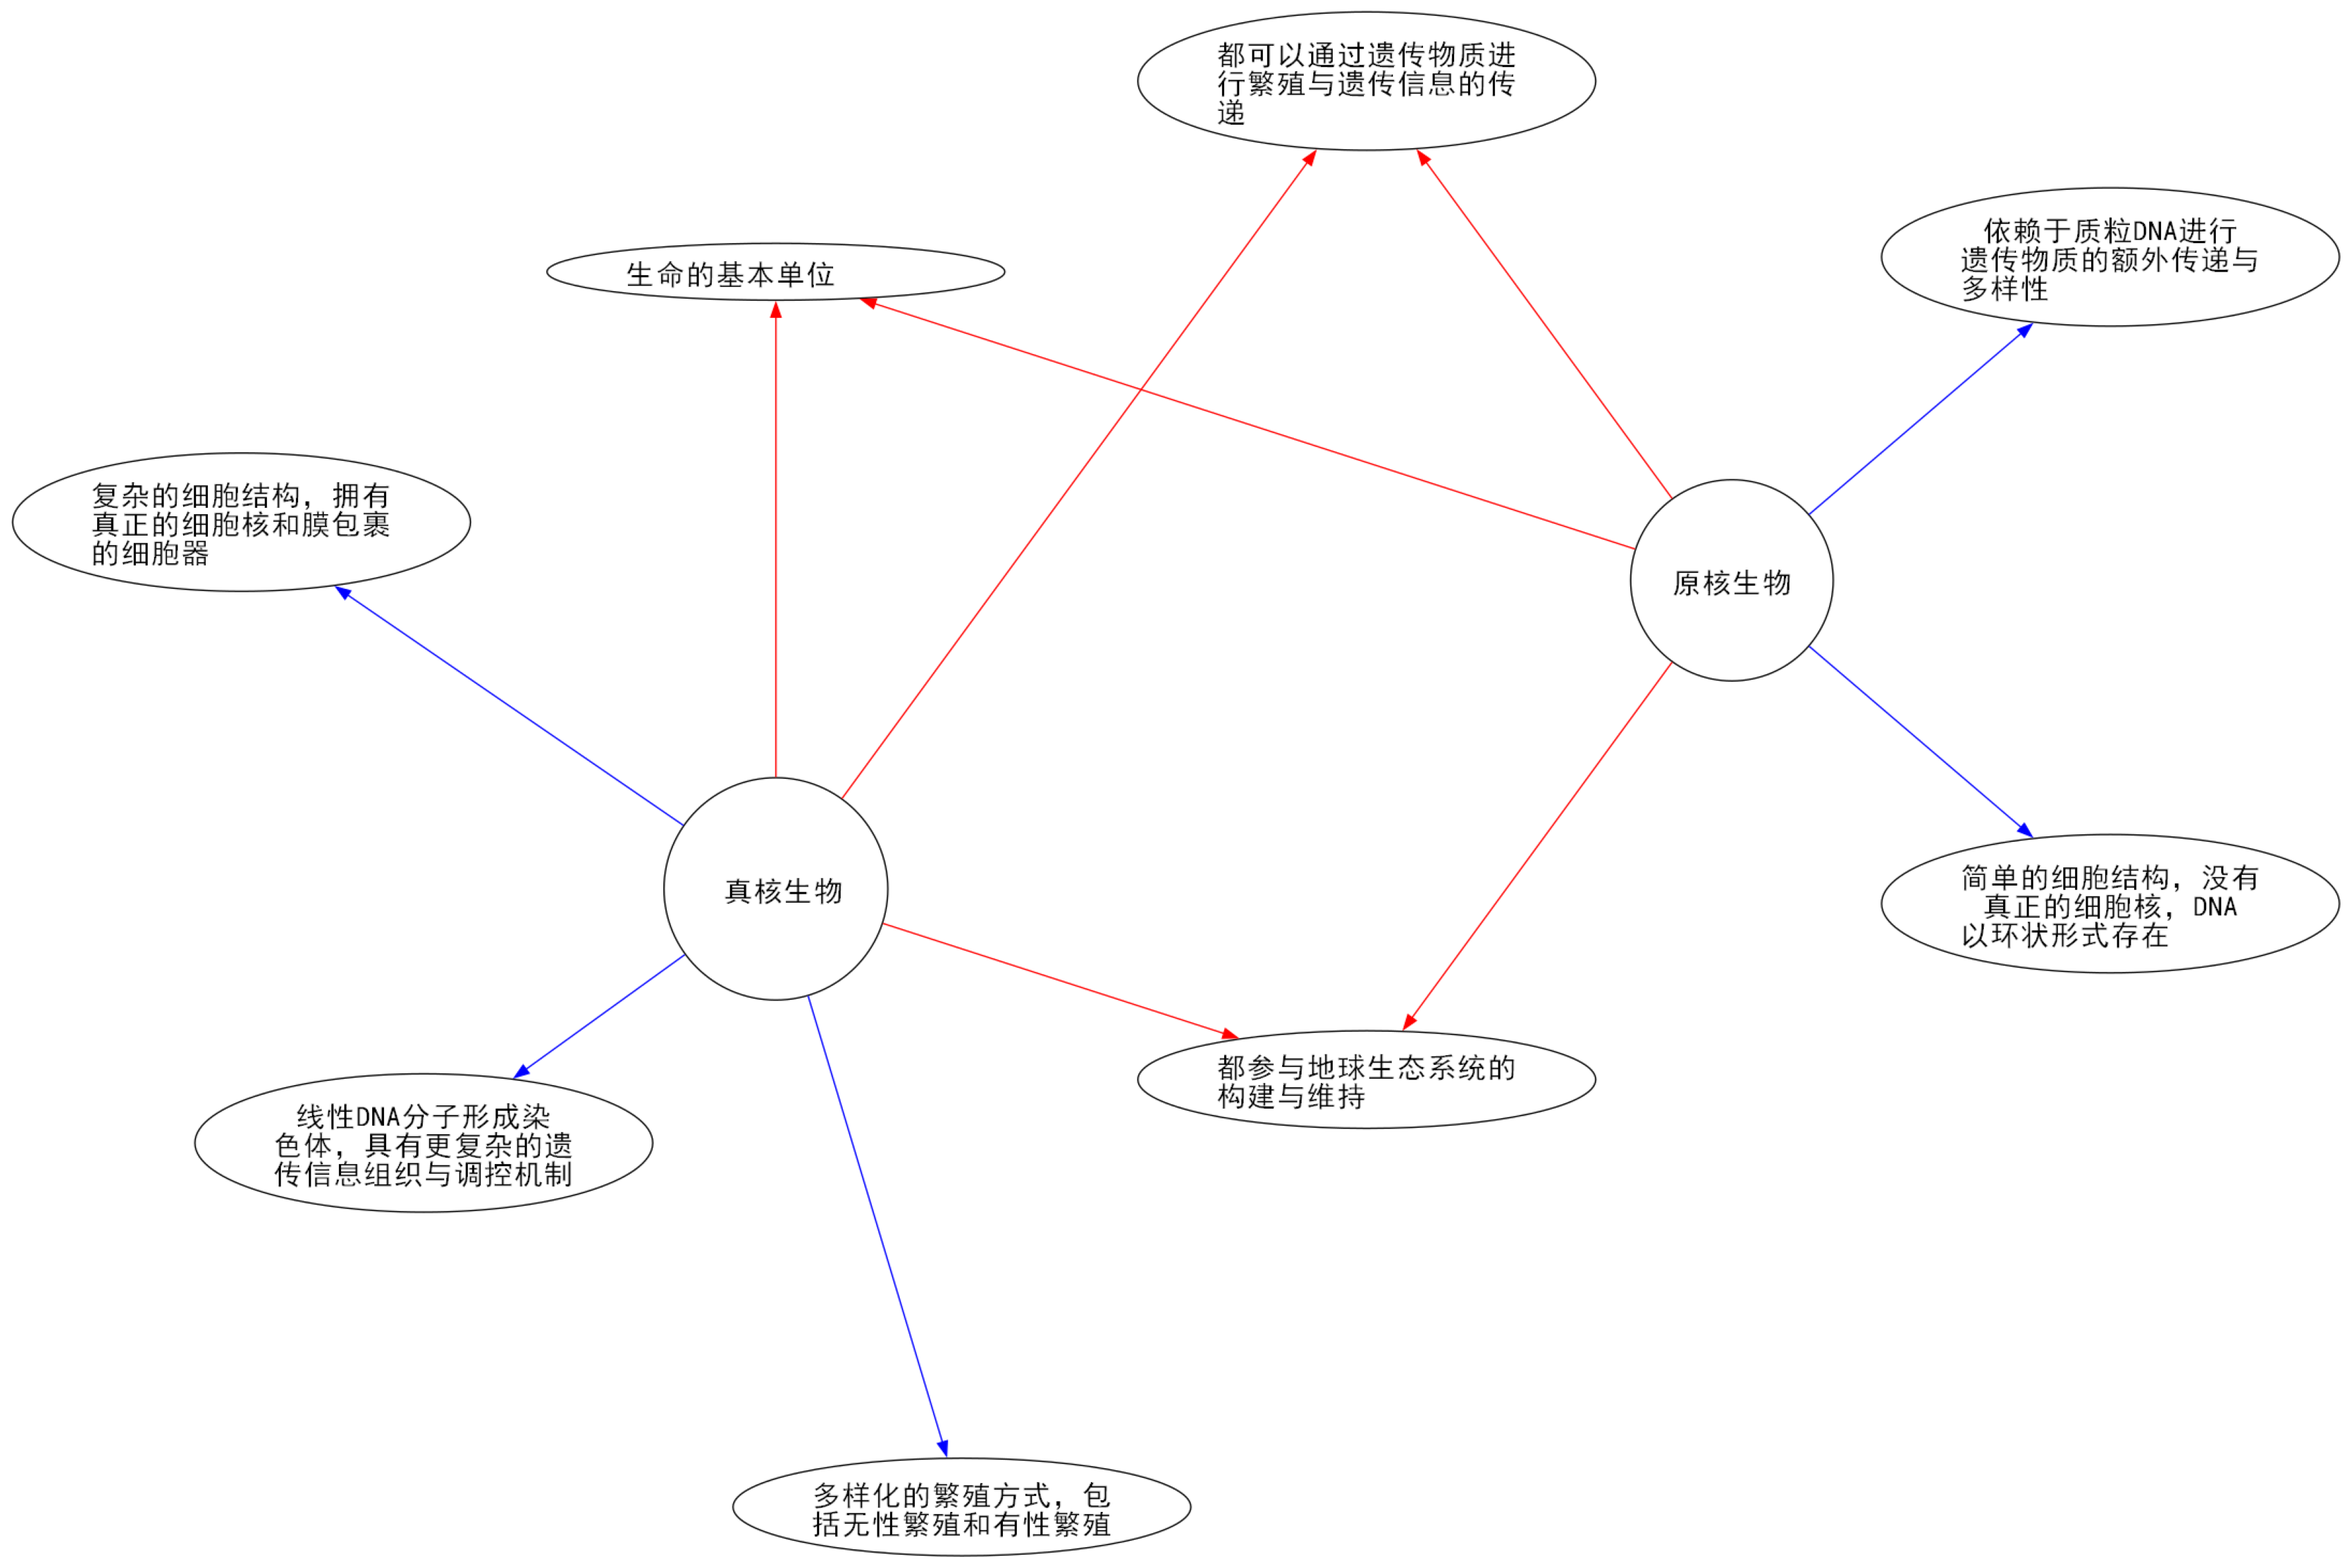

In [28]:
from graphviz import Digraph  
import matplotlib.pyplot as plt
import matplotlib.style as mls
mls.use('ggplot')
def show_map(save_path):
    image=plt.imread(save_path+'.png')
    h,w=image.shape[:2]
    plt.figure(figsize=(w*2/plt.rcParams['figure.dpi'], h*2/plt.rcParams['figure.dpi']))
    plt.imshow(image,aspect='auto')
    plt.axis('off')
    plt.show()

def prepare_text(text,max_len=10):
    new_text=[]
    while True:
        if len(text)>max_len:
            new_text.append(text[:max_len])
            text=text[max_len:]
        else:
            new_text.append(text+' '*(max_len*2-2*len(text)))
            break
    return '\\n'.join(new_text)

def draw_double_Bubble_Map(input,save_path='双泡图'):
    input=input.replace('<|im_end|>','').replace('\n\n','\n')
    title='双泡图'
    dot = Digraph(comment=title,format='png',engine='circo') 
    dot.graph_attr['mindist'] = '2.0' 
    #dot.graph_attr['rankdir'] = 'LR'
    #dot.graph_attr['splines'] = 'line'  # 设置节点间的连接线为直线
    dot.attr('node', fontname='simhei', fontsize='20')  # 设置节点默认字体  
    dot.attr('edge', fontname='simhei', fontsize='10')  # 设置边默认字体（如果边上有标签）
    attribute_list=input.split('\n### ')
    objects=attribute_list[0].split(':')[-1].replace('\n','').split('，')
    root1=objects[0].replace('*','')
    root2=objects[1].replace('*','')
    dot.node(root1,root1,shape='circle')
    dot.node(root2,root2,shape='circle')
    commonds=attribute_list[1].split('\n')[1:]
    for i,commond in enumerate(commonds):
        commond_name=commond.split(':')[-1]
        commond_name=prepare_text(commond_name.replace(' ',''))
        dot.node(commond_name,commond_name)
        dot.edge(root1,commond_name,color='red')
        dot.edge(root2,commond_name,color='red')

    features1=attribute_list[2].split('\n')[1:]
    for i,feature in enumerate(features1):
        feature_name=feature.split(':')[-1]
        feature_name=prepare_text(feature_name.replace(' ',''))
        dot.node(feature_name,feature_name)
        dot.edge(root1,feature_name,color='blue')

    features2=attribute_list[3].split('\n')[1:-1]
    for i,feature in enumerate(features2):
        feature_name=feature.split(':')[-1] 
        feature_name=prepare_text(feature_name.replace(' ',''))
        dot.node(feature_name,feature_name)
        dot.edge(root2,feature_name,color='blue')
    dot.render(save_path, view=False,cleanup=True)
draw_double_Bubble_Map(results)
show_map('双泡图')

In [14]:
!python main.py -i "分析保路运动原因和影响" -ip "notebook/test_input/test_input1.txt" -mt "multi_flow_map"

verbose=True router_chain=LLMRouterChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['input'], output_parser=RouterOutputParser(), template='给语言模型一个原始文本输入，让其选择最适合输入的模型提示。系统将为您提供可用提示的名称以及最适合改提示的描述。如果你认为修改原始输入最终会导致语言模型做出更好的响应，你也可以修改原始输入。\n\n\n<< 格式 >>\n返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 原始输入的改进版本\n}}\n\n\n\n记住：“destination”必须是下面指定的候选提示名称之一，或者如果输入不太适合任何候选提示，则可以是 “DEFAULT” 。\n记住：如果您认为不需要任何修改，则 “next_inputs” 可以只是原始输入。\n\n<< 候选提示 >>\n气泡图: 擅长找出中心事物的多个属性，进而将输入文本结构化成气泡图所需形式。\n双泡图: 擅长对比两个事物，能够找出两个事物的相同点和不同点，进而将输入文本结构化成双泡图所需形式。\n树形图: 擅长对事物进行分类，能够找出中心事物的主要类别，能够把进而将输入文本结构化成树形图所需形式。\n组织图: 擅长总结出事情的背景、过程、意义，进而将输入文本结构化成组织图所需形式。\n流程图: 擅长梳理事件的顺序，能够按时间顺序将事件划分为若干个阶段，进而将输入文本结构化成流程图所需形式。\n复流程图: 擅长总结事件的原因和影响，进而将输入文本结构化成复流程图所需形式。\n\n<< 输入 >>\n{input}\n\n<< 输出 (记得要包含 ```json)>>\n\n样例:\n<< 输入 >>\n"总结地球的气候类型"\n<< 输出 >>\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain\chat_models\__init__.py:33: LangChainDeprecationWarning: Importing chat models from langchain is deprecated. Importing from langchain will no longer be supported as of langchain==0.2.0. Please import from langchain-community instead:

`from langchain_community.chat_models import ChatOpenAI`.

To install langchain-community run `pip install -U langchain-community`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\langcha




> Entering new MultiPromptChain chain...
复流程图: {'input': '分析保路运动原因和影响'}
> Finished chain.
{'text/markdown': '## 事件: 铁路国有化与保路运动\n\n### 原因：\n- 新政之前的官方政策推动铁路建设，尤其是清政府在甲午战争后至1911年间的大规模铁路建设。\n- 主要依赖外资资助修建铁路，导致清政府丧失铁路管理权和经济利益。\n- 1903年《铁路简明章程》放宽华人投资铁路的限制，引发收回路权运动。\n- 商办铁路公司面临资金短缺和经营问题，促使清政府考虑铁路国有化政策。\n\n### 影响：\n- 清政府最终发布“铁路国有”上谕，引发大规模保路运动。\n- 保路运动在四川升级，导致成都血案，加剧社会动荡。\n- 清政府抽调湖北新军前往四川镇压，间接引发武昌起义。\n- 武昌起义后，湖北成为全国第一个脱离清王朝的政权，加速了清朝灭亡的过程。'}
Figure(1178x938)
